In [18]:

import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sc
from src import soporte_nulos as sn

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_csv("../data/api_rent_madrid_extract.csv", index_col = 0, sep=";").reset_index(drop=True)
df.head(1)

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,priceByArea,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology
0,750.00,flat,rent,60.00,True,1,1,Madrid,good,False,13.00,3,Hortaleza,Canillas,True,NaN,flat,NaN


In [20]:
gestionar_nulos = sn.GestionNulos(df)
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

status             3.97
newDevelopment     3.97
priceByArea        3.97
floor             17.85
district          14.73
neighborhood      50.71
hasLift            5.10
hasParkingSpace   76.49
typology           3.97
subTypology       80.17
dtype: float64

In [21]:
gestionar_nulos.mostrar_distribucion_categoricas()

La distribución de las categorías para la columna STATUS


status
good             0.96
newdevelopment   0.04
renew            0.01
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna NEWDEVELOPMENT


newDevelopment
False   0.96
True    0.04
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna FLOOR


floor
1    0.24
bj   0.20
2    0.19
3    0.17
4    0.11
5    0.03
en   0.02
8    0.01
6    0.01
st   0.00
7    0.00
14   0.00
ss   0.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna DISTRICT


district
Centro                       0.16
Villaverde                   0.08
Puente de Vallecas           0.06
Tetuán                       0.04
San Blas                     0.04
                             ... 
El Mirador                   0.00
Pol. Industrial sur          0.00
San Isidro                   0.00
Pryconsa - Poligono Europa   0.00
Alcobendas Centro            0.00
Name: proportion, Length: 83, dtype: float64

........................
La distribución de las categorías para la columna NEIGHBORHOOD


neighborhood
Lavapiés-Embajadores   0.06
Villaverde Alto        0.05
Valdeacederas          0.05
San Diego              0.05
Los Rosales            0.04
                       ... 
Portazgo               0.01
Jerónimos              0.01
Pradolongo             0.01
Pilar                  0.01
Concepción             0.01
Name: proportion, Length: 74, dtype: float64

........................
La distribución de las categorías para la columna HASLIFT


hasLift
True    0.52
False   0.48
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna HASPARKINGSPACE


hasParkingSpace
True   1.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna TYPOLOGY


typology
flat           0.99
chalet         0.01
countryHouse   0.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna SUBTYPOLOGY


subTypology
studio             0.66
duplex             0.16
penthouse          0.14
independantHouse   0.01
terracedHouse      0.01
countryHouse       0.01
Name: proportion, dtype: float64

........................


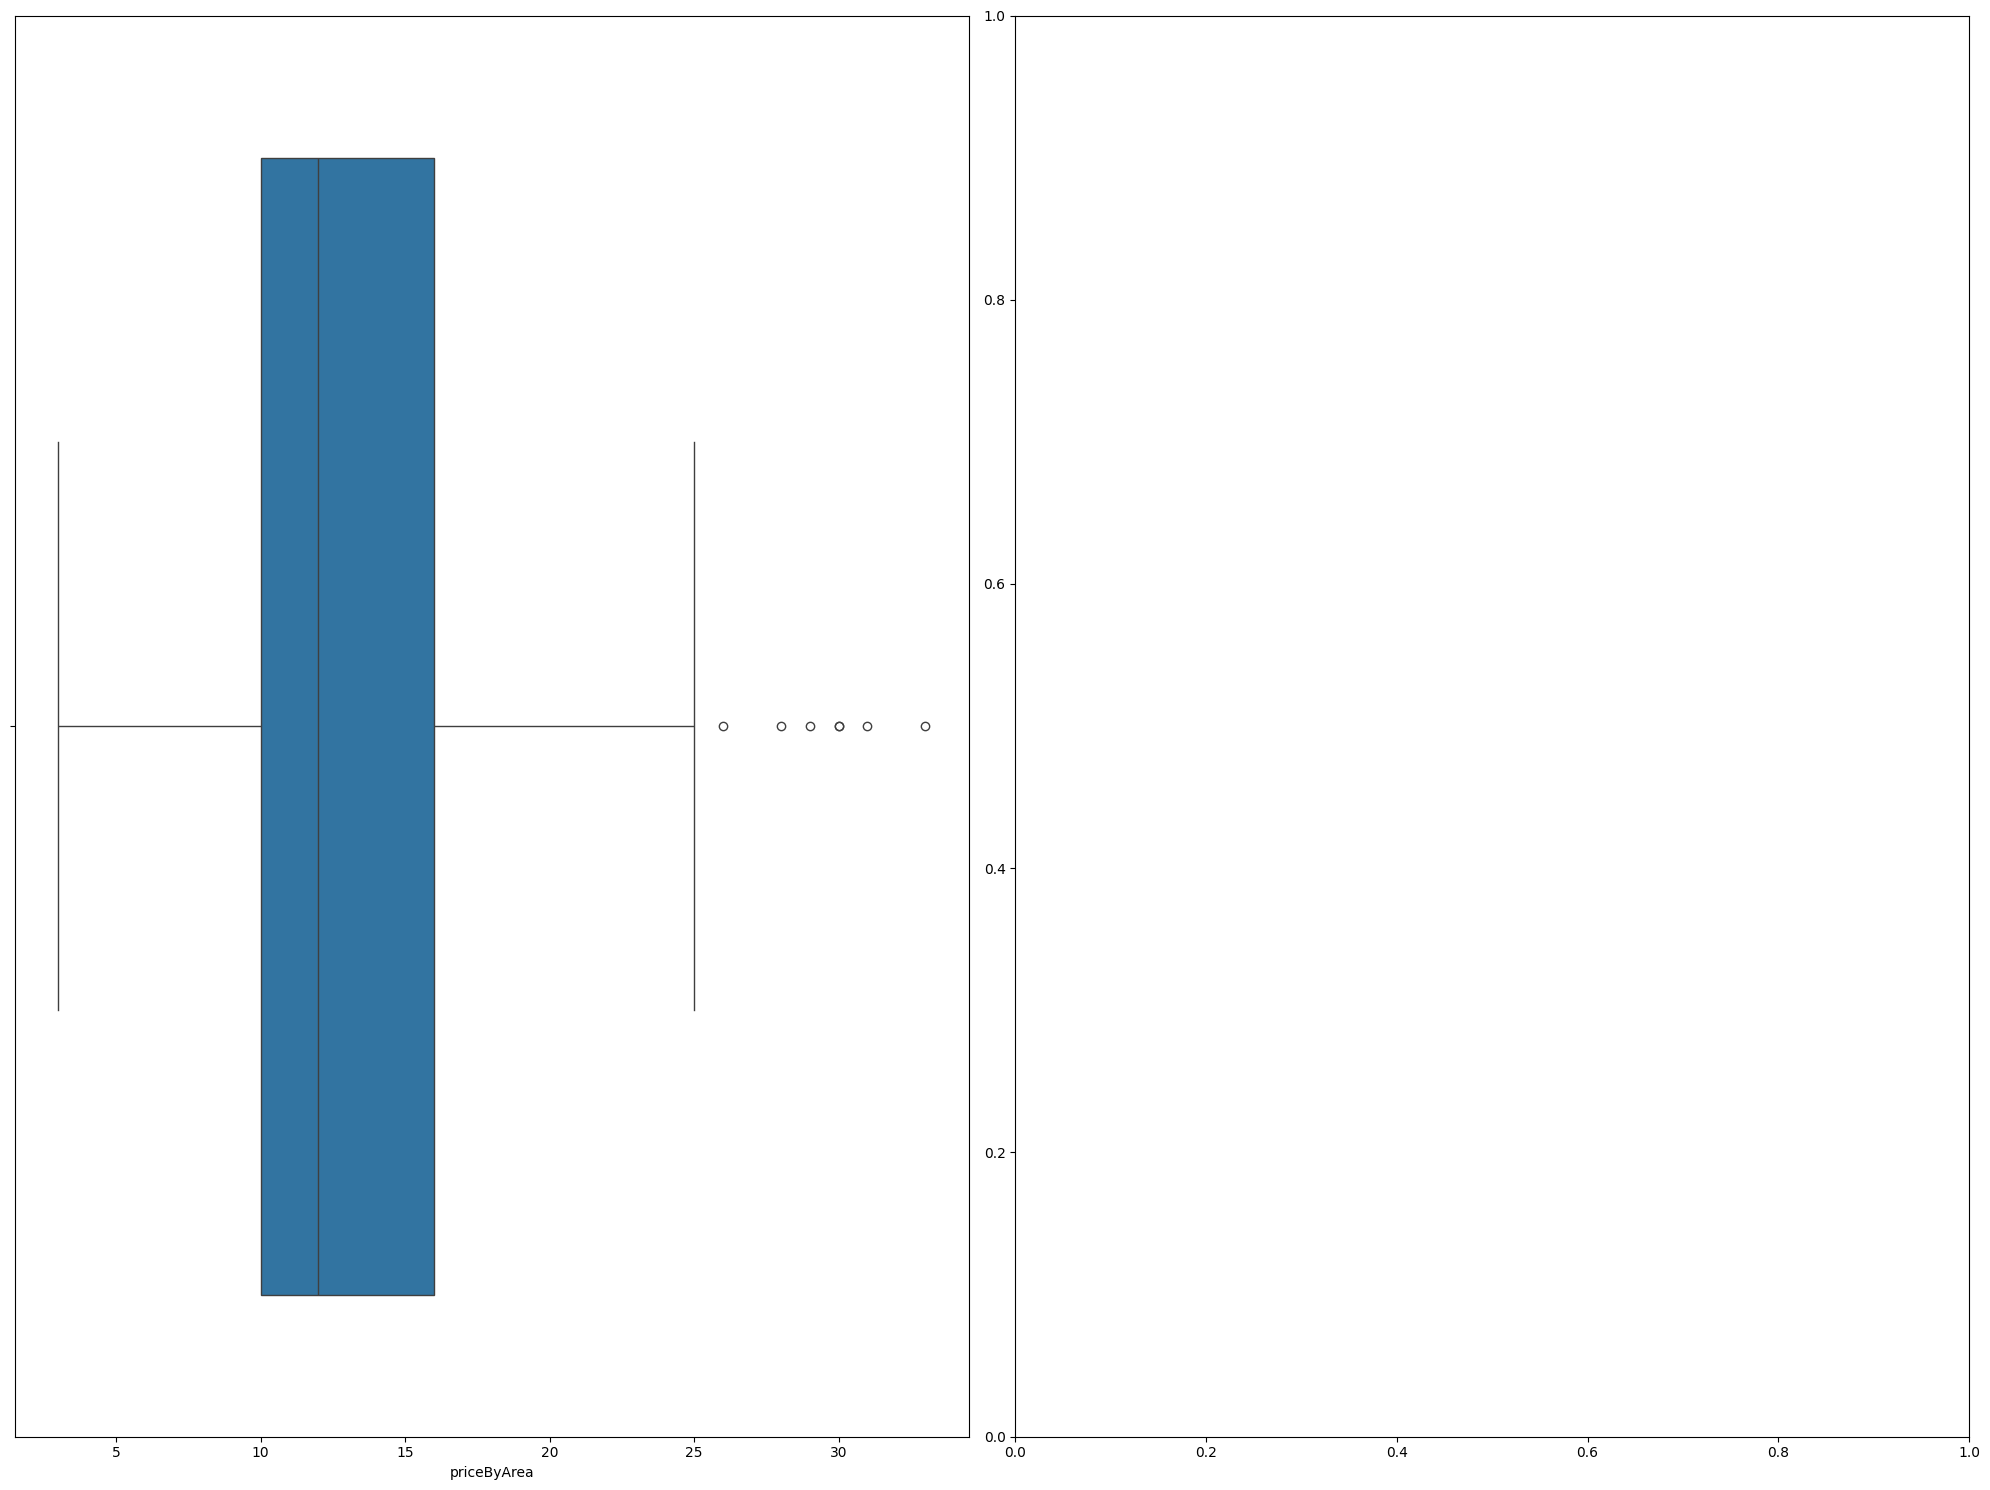

In [22]:
gestionar_nulos.identificar_nulos_numericas()

In [23]:
numericas = ["priceByArea"]
gestionar_nulos = sn.GestionNulos(df)
df = gestionar_nulos.imputar_knn(numericas)

In [24]:
df.head(3)

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,priceByArea,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea_knn
0,750.00,flat,rent,60.00,True,1,1,Madrid,good,False,13.00,3,Hortaleza,Canillas,True,NaN,flat,NaN,13.00
1,750.00,flat,rent,70.00,True,2,1,San Sebastián de los Reyes,good,False,11.00,bj,Centro Urbano,NaN,False,NaN,flat,NaN,11.00
2,400.00,penthouse,rent,67.00,True,2,2,Villamanrique de Tajo,good,False,6.00,2,NaN,NaN,False,NaN,flat,penthouse,6.00


In [25]:
numericas = ["priceByArea"]
gestionar_nulos = sn.GestionNulos(df)
df = gestionar_nulos.imputar_imputer(numericas)

In [26]:
df.head(3)

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,priceByArea,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea_knn,priceByArea_iterative
0,750.00,flat,rent,60.00,True,1,1,Madrid,good,False,13.00,3,Hortaleza,Canillas,True,NaN,flat,NaN,13.00,13.00
1,750.00,flat,rent,70.00,True,2,1,San Sebastián de los Reyes,good,False,11.00,bj,Centro Urbano,NaN,False,NaN,flat,NaN,11.00,11.00
2,400.00,penthouse,rent,67.00,True,2,2,Villamanrique de Tajo,good,False,6.00,2,NaN,NaN,False,NaN,flat,penthouse,6.00,6.00


In [27]:
gestionar_nulos.comparar_metodos()

,priceByArea,priceByArea_iterative,priceByArea_knn
count,339.00,353.00,353.00
mean,13.29,13.29,13.29
std,5.11,5.01,5.01
min,3.00,3.00,3.00
25%,10.00,10.00,10.00
50%,12.00,12.00,12.00
75%,16.00,16.00,16.00
max,33.00,33.00,33.00


In [28]:
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

status             3.97
newDevelopment     3.97
priceByArea        3.97
floor             17.85
district          14.73
neighborhood      50.71
hasLift            5.10
hasParkingSpace   76.49
typology           3.97
subTypology       80.17
dtype: float64

In [29]:
columnas_moda = []
columnas_desconocido = ["status", "newDevelopment", "floor","district","neighborhood","hasLift","hasParkingSpace","typology","subTypology"]
df = gestionar_nulos.imputar_nulos_categoricas(columnas_moda, columnas_desconocido)

In [30]:
df.head(3)

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,priceByArea,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea_knn,priceByArea_iterative
0,750.00,flat,rent,60.00,True,1,1,Madrid,good,False,13.00,3,Hortaleza,Canillas,True,Unknown,flat,Unknown,13.00,13.00
1,750.00,flat,rent,70.00,True,2,1,San Sebastián de los Reyes,good,False,11.00,bj,Centro Urbano,Unknown,False,Unknown,flat,Unknown,11.00,11.00
2,400.00,penthouse,rent,67.00,True,2,2,Villamanrique de Tajo,good,False,6.00,2,Unknown,Unknown,False,Unknown,flat,penthouse,6.00,6.00


In [31]:
df.drop(["priceByArea","priceByArea_iterative"], axis = 1, inplace = True)

In [32]:
df.rename(columns = {"priceByArea_knn": "priceByArea"}, inplace = True )

In [33]:
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

Series([], dtype: float64)

In [34]:
df.to_csv("../data/api_rent_madrid_extract_sin_nulos.csv", sep=";")